### 1. Consider the following Python module:
#### a = 0
def b():
    global a
####      a = c(a)
#### def c(a):
####      return a + 2

### Created PS2_Module_1 with the above methods and imported them as follows

In [1]:
import sys
sys.path.append('\.PS2_Module_1')

In [3]:
import PS2_Module_1

In [7]:
PS2_Module_1.b()

In [9]:
PS2_Module_1.b()

In [10]:
PS2_Module_1.b()

In [11]:
PS2_Module_1.a

6

### The value for 'a' at the end is 6. At first the value of 'a' is 0. Each time the function b() is executed, the value of a is increased by 2. This is because the use of global inside the method b() is changing the value of a.

##### At first: a=0
##### 1st time execution of b(): global a = 0; a = c(a); c(a) returns 0+2; so a= 2
##### 2nd time execution of b(): global a= 2; a = c(a); c(a) returns 2+2; so a= 4
##### 3rd time execution of b(): global a= 4; a = c(a); c(a) returns 4+2; so a= 6


### 2. Function fileLength(), given to you, takes the name of a file as input and returns the length of the file. If the file cannot be found by the interpreter or if it cannot be read as a text file, an exception will be raised. Modify function fileLength() so that a friendly message is printed instead.

In [66]:
def fileLength(name):
    'Takes the file name as the input and outputs length. Returns customized error if file not found'
    try:
        input_file = open(name, 'r')
        file_data = input_file.read()
        print(len(file_data))
        input_file.close()
        
    except FileNotFoundError as file_error_customized:
        print('File {} not found'.format(name))         #Cusomized error message

In [67]:
fileLength('C:/Users/user/Desktop/File_For_Count_of_Length.txt')

49


In [68]:
fileLength('midterm.py')

File midterm.py not found


### 3. Write a class named Marsupial that can be used as shown. Now write a class named Kangaroo as a subclass of Marsupial that inherits all the attributes of Marsupial and also:
a. extends the Marsupial __init__ constructor to take, as input, the coordinates x and y of the Kangaroo object,
b. supports method jump that takes number values dx and dy as input and moves the kangaroo by dx units along the x-axis and by dy units along the y-axis, and
c. overloads the __str__ operator so it behaves as shown below.

In [70]:
class Marsupial():
    'Super class for Kangaroo - Has list initiation'
    
    def __init__(self, initial = []):
        'Initializing the list'
        self.lst = []
    
    def put_in_pouch(self, item):
        'Appending the list'
        self.lst.append(item)
        
    def pouch_contents(self):
        'Returns the list'
        return self.lst

In [71]:
m = Marsupial()

In [72]:
m.put_in_pouch('doll')
m.put_in_pouch('firetruck')
m.put_in_pouch('kitten')

In [73]:
m.pouch_contents()

['doll', 'firetruck', 'kitten']

In [74]:
class Kangaroo(Marsupial):
    'Sub class extending Marsupial Class - has coordinates for the Kangaroo'
    
    def __init__(self, itemx, itemy):
        'Initializing x and y coordinates'
        self.xcoord = itemx
        self.ycoord = itemy
        self.lst = []
        Marsupial.__init__(self, self.lst)
        
    def jump(self, dx, dy):
        'Changing the coordinates of x and y with jump'
        self.xcoord = self.xcoord + dx
        self.ycoord = self.ycoord + dy
        
    def __str__(self):
        'Overloads __str__ method to return the customized string'
        return 'I am a Kangaroo located at coordinates({}, {})'.format(self.xcoord, self.ycoord)

In [75]:
k = Kangaroo(0, 0)

In [76]:
print(k)

I am a Kangaroo located at coordinates(0, 0)


In [78]:
k.put_in_pouch('doll')
k.put_in_pouch('firetruck')
k.put_in_pouch('kitten')

In [79]:
k.pouch_contents()

['doll', 'firetruck', 'kitten']

In [81]:
k.jump(1, 0)
k.jump(1, 0)
k.jump(1, 0)

In [82]:
print(k)

I am a Kangaroo located at coordinates(3, 0)


### 4. Implement a new GUI class App that combines user-defined tkinter widget classes Calculator and Mortgage.

### Mortgage Class

In [144]:
from tkinter import Tk, Canvas, Frame, BOTH, Button, Entry, END, Label, LEFT, RIGHT, RAISED
import math

class Mortgage(Frame):
    'Calculates Monthly Mortgage Payments'
    
    def __init__(self, parent):
        Frame.__init__(self, parent)
        
        label = Label(self, text='Loan Amount:')
        label.grid(row=0, column=0, padx=10, pady=10)
        
        self.loanEnt = Entry(self)
        self.loanEnt.grid(row=0, column=1, padx=10, pady=10)
        
        label = Label(self, text='Interest Rate:')
        label.grid(row=1, column=0, padx=10, pady=5)
        
        self.interestEnt = Entry(self)
        self.interestEnt.grid(row=1, column=1, padx=10, pady=5)
        
        label = Label(self, text='Loan Terms:')
        label.grid(row=2, column=0, padx=10, pady=5)
        
        self.termsEnt = Entry(self)
        self.termsEnt.grid(row=2, column=1, padx=10, pady=5)
        
        button = Button(self, text='Compute Mortgage:', command=self.compute)
        button.grid(row=3, column=0, padx=10, pady=5)
        
        self.mortgageAmount = Entry(self)
        self.mortgageAmount.grid(row=3, column=1, padx=10, pady=5)
        
    def compute(self):
        self.P = float(self.loanEnt.get())
        self.r = float(self.interestEnt.get())/100
        self.t = float(self.termsEnt.get())
        self.n = 12
        self.M = (self.P*(self.r/self.n)*(1 + (self.r / self.n))**(self.n*self.t))/(((1 + (self.r / self.n))**(self.n*self.t)) - 1)
        self.mortgageAmount.delete(0, END)
        self.mortgageAmount.insert(0, round(self.M, 2))

### Calculator Class

In [163]:
class Calculator(Frame):
    
    def __init__(self, parent):
        Frame.__init__(self, parent)
        
        self.displayArea = Entry(self, bg = 'gray75')
        self.displayArea.grid(row=0, column=1, padx=5, pady=5)
        self.displayArea.focus_set()
        
        buttonMC = Button(self, text='MC', bg ='white', command=self.clearall, height=1, width=3, relief=RAISED)
        buttonMC.grid(row=1, column=0, padx=5, pady=5)
        
        buttonMP = Button(self, text='M+', bg ='white', command=self.clearall, height=1, width=3, relief=RAISED)
        buttonMP.grid(row=1, column=1, padx=5, pady=5)
        
        buttonMM = Button(self, text='M-', bg ='white', command=self.clearall, height=1, width=3, relief=RAISED)
        buttonMM.grid(row=1, column=2, padx=5, pady=5)
        
        buttonMR = Button(self, text='MR', bg ='white', command=self.clearall, height=1, width=3, relief=RAISED)
        buttonMR.grid(row=1, column=3, padx=5, pady=5)
        
        ##
        
        
        buttonC = Button(self, text='C', bg ='white', height=1, width=3, relief=RAISED, command=self.clearall)
        buttonC.grid(row=2, column=0, padx=5, pady=5)
        
        buttonSquareRoot = Button(self, text='SqR', bg ='white', height=1, width=3, relief=RAISED, command=self.squareRoot)
        buttonSquareRoot.grid(row=2, column=1, padx=5, pady=5)
        
        buttonSquare = Button(self, text='x^2', bg ='white', height=1, width=3, relief=RAISED, command=self.square)
        buttonSquare.grid(row=2, column=2, padx=5, pady=5)
        
        buttonPlus = Button(self, text='+', bg ='white', height=1, width=3, relief=RAISED, command=lambda:self.action('+'))
        buttonPlus.grid(row=2, column=3, padx=5, pady=5)
        
        ##
        
        button7 = Button(self, text='7', bg ='white', height=1, width=3, relief=RAISED, command=lambda:self.action(7))
        button7.grid(row=3, column=0, padx=5, pady=5)
        
        button8 = Button(self, text='8', bg ='white', height=1, width=3, relief=RAISED, command=lambda:self.action(8))
        button8.grid(row=3, column=1, padx=5, pady=5)
        
        button9 = Button(self, text='9', bg ='white', height=1, width=3, relief=RAISED, command=lambda:self.action(9))
        button9.grid(row=3, column=2, padx=5, pady=5)
        
        buttonMinus = Button(self, text='-', bg ='white', width=3, relief=RAISED, command=lambda:self.action('-'))
        buttonMinus.grid(row=3, column=3, padx=5, pady=5)
        
        ##
        
        button4 = Button(self, text='4', bg ='white', height=1, width=3, relief=RAISED, command=lambda:self.action(4))
        button4.grid(row=4, column=0, padx=5, pady=5)
        
        button5 = Button(self, text='5', bg ='white', height=1, width=3, relief=RAISED, command=lambda:self.action(5))
        button5.grid(row=4, column=1, padx=5, pady=5)
        
        button6 = Button(self, text='6', bg ='white', height=1, width=3, relief=RAISED, command=lambda:self.action(6))
        button6.grid(row=4, column=2, padx=5, pady = 5)
        
        buttonMinus = Button(self, text='*', bg ='white', width=3, relief=RAISED, command=lambda:self.action('*'))
        buttonMinus.grid(row=4, column=3, padx=5, pady=5)
        
        ##
        
        button1 = Button(self, text='1', bg ='white', height=1, width=3, relief=RAISED, command=lambda:self.action(1))
        button1.grid(row=5, column=0, padx=5, pady=5)
        
        button2 = Button(self, text='2', bg ='white', height=1, width=3, relief=RAISED, command=lambda:self.action(2))
        button2.grid(row=5, column=1, padx=5, pady=5)
        
        button3 = Button(self, text='3', bg ='white', height=1, width=3, relief=RAISED, command=lambda:self.action(3))
        button3.grid(row=5, column=2, padx=5, pady=5)
        
        buttonDivide = Button(self, text='/', bg ='white', height=1, width=3, relief=RAISED, command=lambda:self.action('/'))
        buttonDivide.grid(row=5, column=3, padx=5, pady=5)
        ##
        button0 = Button(self, text='0', bg ='white', height=1, width=3, relief=RAISED, command=lambda:self.action(0))
        button0.grid(row=6, column=0, padx=5, pady=5)
        
        buttonPoint = Button(self, text='.', bg ='white', height=1, width=3, relief=RAISED, command=lambda:self.action('.'))
        buttonPoint.grid(row=6, column=1, padx=5, pady=5)
        
        buttonPlusMinus = Button(self, text='+-', bg ='white', height=1, width=3, relief=RAISED, command=lambda:self.action('-'))
        buttonPlusMinus.grid(row=6, column=2, padx=5, pady=5)
        
        buttonEquals = Button(self, text='=', bg ='white', height=1, width=3, relief=RAISED, command=lambda:self.equals())
        buttonEquals.grid(row=6, column=3, padx=5, pady=5)
        
    def action(self,argi): 
        'pressed button value is inserted into the end of the text area'
        self.displayArea.insert(END,argi) 
                
    def getandreplace(self): 
        'replace x with *'
        self.expression = self.displayArea.get()  
        self.newtext=self.expression.replace('x','*') 
  
  
    def equals(self): 
        """when the equal button is pressed"""
        self.getandreplace() 
        try: 
            # evaluate the expression using the eval function 
            self.value= eval(self.newtext)  
        except SyntaxError or NameError: 
            self.displayArea.delete(0,END) 
            self.displayArea.insert(0,'Invalid Input!') 
        else: 
            self.displayArea.delete(0,END) 
            self.displayArea.insert(0,self.value)
            
    def clearall(self): 
        """when clear button is pressed,clears the text input area"""
        self.displayArea.delete(0,END) 
        
    def squareRoot(self): 
        """squareroot method"""
        self.getandreplace() 
        try: 
            # evaluate the expression using the eval function 
            self.value= eval(self.newtext)  
        except SyntaxError or NameError: 
            self.displayArea.delete(0,END) 
            self.displayArea.insert(0,'Invalid Input!') 
        else: 
            self.sqrtval=math.sqrt(self.value) 
            self.displayArea.delete(0,END) 
            self.displayArea.insert(0,self.sqrtval) 
  
    def square(self): 
        """square method"""
        self.getandreplace() 
        try: 
            #evaluate the expression using the eval function 
            self.value= eval(self.newtext)  
        except SyntaxError or NameError: 
            self.displayArea.delete(0,END) 
            self.displayArea.insert(0,'Invalid Input!') 
        else: 
            self.sqval=math.pow(self.value,2) 
            self.displayArea.delete(0,END) 
            self.displayArea.insert(0,self.sqval) 

### App Class

In [164]:
class App(Frame):
    'Combines Mortgage and Calculator classes'
    
    def __init__(self, master):
        Frame.__init__(self, master)
        mortgage = Mortgage(self)
        mortgage.pack(side=LEFT)
        calculator = Calculator(self)
        calculator.pack(side=RIGHT)

In [165]:
from tkinter import Tk
root = Tk()
app = App(root)

In [166]:
app.pack()

In [167]:
root.mainloop()

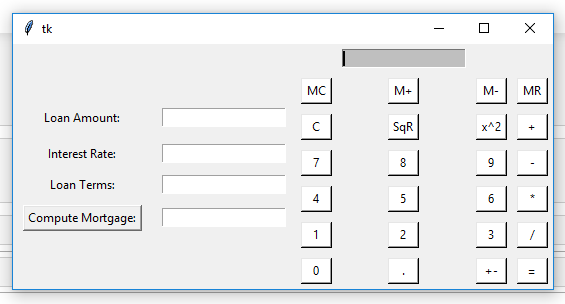

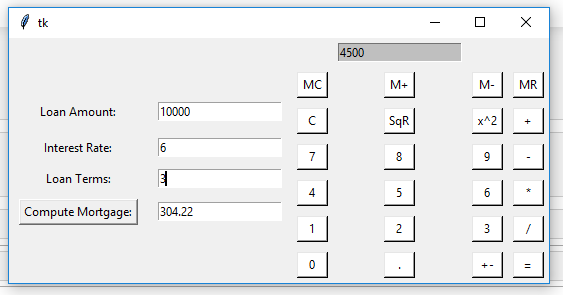

#### *Referred Calculator creation in https://www.geeksforgeeks.org/python-simple-calculator-using-tkinter/

### 5. Write function collatz() that takes a positive integer x as input and prints the Collatz sequence starting at x. A Collatz sequence is obtained by repeatedly applying this rule to the previous number x in the sequence
x = 𝑥/2 𝑖𝑓 𝑥 𝑖𝑠 𝑒𝑣𝑒𝑛 and 
x = 3𝑥+1 𝑖𝑓 𝑥 𝑖𝑠 𝑜𝑑𝑑

In [103]:
def collatz(x):
    'function which prints Collatz sequence'
    try:
        if(x < 1):                   #Checks if x is a positive integer
            raise ValueError
        
        if (x == 1):                 #Prints 1 if x value is 1
            print(1)
        elif (x%2 == 0):             
            print(int(x))            
            collatz(x/2)             #Value of x is even so Recursive Function for x/2
        else:
            print(int(x))            
            collatz((3*x) + 1)       #Value of x is odd so Recursive Function for 3x + 1
            
    except ValueError:
        print("x should be a positive integer")

In [105]:
collatz(1)

1


In [104]:
collatz(10)

10
5
16
8
4
2
1


### 6. Write a recursive method binary() that takes a non-negative integer n and prints the binary representation of integer n.

In [106]:
def binary(n):
    'Returns binary value of a non-negative integer'
    try:
        if(n<0):
            raise ValueError        #Raises ValueError if n is negative
        if n > 1:                   
            binary(n//2)            #Recursive Function of half value of n without decimals
        print (n % 2, end = '')
    except ValueError:
        print('Value of n should not be negative.')

In [107]:
binary(0)

0

In [108]:
binary(1)

1

In [109]:
binary(3)

11

In [110]:
binary(9)

1001

#### *end functionality inside print() referred from https://www.geeksforgeeks.org/gfact-50-python-end-parameter-in-print/

### 7. Implement a class named HeadingParser that can be used to parse an HTML document, and retrieve and print all the headings in the document. You should implement your class as a subclass of HTMLParser, defined in Standard Library module html.parser. When fed a string containing HTML code, your class should print the headings, one per line and in the order in which they appear in the document. Each heading should be indented as follows: an h1 heading should have indentation 0, and h2 heading should have indentation 1, etc. Test your implementation using w3c.html.

In [114]:
from html.parser import HTMLParser
import re

class HeadingParser(HTMLParser):
    'Class which gives prints headings of a html file'
    
    def __init__(self):
        HTMLParser.__init__(self)

    def handle_data(self, data):
        'Prints the heading value in a prescribed format.'
        
        if self.head_tag:
            self.indentstr = self.name_tag[1:]
            print('{}{}'.format((int(self.indentstr)-1)*' ', data), end = '') #Output with indendation
            
    def handle_starttag(self, tag, attrs):
        'Assigns the header tag to variables to be used in handle_data.'
        
        self.name_tag = tag
        self.head_tag = re.findall("h[0-9]+", tag)  

In [115]:
infile = open('C:/Users/user/Desktop/w3c.html') 
content = infile.read() 
infile.close()

In [116]:
from html.parser import HTMLParser 
parser = HeadingParser()
parser.feed(content)

W3C Mission
 Principles 


### 8. Implement recursive function webdir() that takes as input: a URL (as a string) and non-negative integers depth and indent. Your function should visit every web page reachable from the starting URL web page in depth clicks or less, and print each web page's URL. As shown below, indentation, specified by indent, should be used to indicate the depth of a URL.

### Creating a class Collector to fetch the URL's

In [155]:
from urllib.parse import urljoin
from urllib.request import urlopen
from html.parser import HTMLParser

class Collector(HTMLParser):
    'collects hyperlink URLs into a list'

    def __init__(self, url):
        'initializes parser, the url, and a list'
        HTMLParser.__init__(self)
        self.url = url
        self.links = []

    def handle_starttag(self, tag, attrs):
        'collects hyperlink URLs in their absolute format'
        if tag == 'a':
            for attr in attrs:
                if attr[0] == 'href':
                    # construct absolute URL
                    absolute = urljoin(self.url, attr[1])
                    if absolute[:4] == 'http': # collect HTTP URLs
                        self.links.append(absolute)
                        
    def getLinks(self):
        'returns hyperlinks URLs in their absolute format'
        return self.links

In [156]:
def webdir(url, depth, indent):
    'Recursive method to find the list of links based on depth value'
    
    try:
        depth_value = int(depth)
        indent_value = int(indent)
        
        if depth_value < 0 or indent_value < 0:      #Raises ValueError if depth or indent is/are negative
            raise ValueError
            
        resource = urlopen(url)
        content = resource.read().decode()
        collector = Collector(url)
        collector.feed(content)
        links = collector.getLinks()                #Gets all the links present in a URL

        if indent_value == 0:
            print('{}'.format(url))

        indent_value += 4
        depth_value = depth_value-1
        
        if depth_value >= 0:
            for link in links:                          #Loops all the links
                print('{}{}'.format(indent_value*' ', link), end = '\n')
                if (depth_value) > 0: 
                    webdir(link, depth_value, indent_value)           #Recursive function to print the links in the next level
                
    except ValueError:
        print("Enter a non-negative number for depth or indent")

In [136]:
webdir('https://www.canada.ca/en/services/immigration-citizenship.html', 2, 0)

https://www.canada.ca/en/services/immigration-citizenship.html
    https://www.canada.ca/en/services/immigration-citizenship.html#wb-cont
        https://www.canada.ca/en/services/immigration-citizenship.html#wb-cont
        https://www.canada.ca/en/services/immigration-citizenship.html#wb-info
        https://www.canada.ca/fr/services/immigration-citoyennete.html
        https://www.canada.ca/en.html
        https://www.canada.ca/en/services/jobs.html
        https://www.canada.ca/en/services/immigration-citizenship.html
        https://travel.gc.ca/
        https://www.canada.ca/en/services/business.html
        https://www.canada.ca/en/services/benefits.html
        https://www.canada.ca/en/services/health.html
        https://www.canada.ca/en/services/taxes.html
        https://www.canada.ca/en/services/environment.html
        https://www.canada.ca/en/services/defence.html
        https://www.canada.ca/en/services/culture.html
        https://www.canada.ca/en/services/policing.htm

        https://www.canada.ca/en.html#wb-cont
        https://www.canada.ca/en.html#wb-info
        https://www.canada.ca/fr.html
        https://www.canada.ca/en.html
        https://www.canada.ca/en/services/jobs.html
        https://www.canada.ca/en/services/immigration-citizenship.html
        https://travel.gc.ca/
        https://www.canada.ca/en/services/business.html
        https://www.canada.ca/en/services/benefits.html
        https://www.canada.ca/en/services/health.html
        https://www.canada.ca/en/services/taxes.html
        https://www.canada.ca/en/services/environment.html
        https://www.canada.ca/en/services/defence.html
        https://www.canada.ca/en/services/culture.html
        https://www.canada.ca/en/services/policing.html
        https://www.canada.ca/en/services/transport.html
        http://international.gc.ca/world-monde/index.aspx?lang=eng
        https://www.canada.ca/en/services/finance.html
        https://www.canada.ca/en/services/science.html
 

        https://travel.gc.ca/#wb-cont
        https://travel.gc.ca/#wb-info
        http://voyage.gc.ca/
        https://www.canada.ca/en.html
        https://www.canada.ca/en/services/jobs.html
        https://www.canada.ca/en/services/immigration-citizenship.html
        https://travel.gc.ca/
        https://www.canada.ca/en/services/business.html
        https://www.canada.ca/en/services/benefits.html
        https://www.canada.ca/en/services/health.html
        https://www.canada.ca/en/services/taxes.html
        https://www.canada.ca/en/services/environment.html
        https://www.canada.ca/en/services/defence.html
        https://www.canada.ca/en/services/culture.html
        https://www.canada.ca/en/services/policing.html
        https://www.canada.ca/en/services/transport.html
        http://international.gc.ca/world-monde/index.aspx?lang=eng
        https://www.canada.ca/en/services/finance.html
        https://www.canada.ca/en/services/finance.html
        http://canada.ca/e

        https://www.canada.ca/en/services/health.html#wb-cont
        https://www.canada.ca/en/services/health.html#wb-info
        https://www.canada.ca/fr/services/sante.html
        https://www.canada.ca/en.html
        https://www.canada.ca/en/services/jobs.html
        https://www.canada.ca/en/services/immigration-citizenship.html
        https://travel.gc.ca/
        https://www.canada.ca/en/services/business.html
        https://www.canada.ca/en/services/benefits.html
        https://www.canada.ca/en/services/health.html
        https://www.canada.ca/en/services/taxes.html
        https://www.canada.ca/en/services/environment.html
        https://www.canada.ca/en/services/defence.html
        https://www.canada.ca/en/services/culture.html
        https://www.canada.ca/en/services/policing.html
        https://www.canada.ca/en/services/transport.html
        http://international.gc.ca/world-monde/index.aspx?lang=eng
        https://www.canada.ca/en/services/finance.html
        h

        https://www.canada.ca/en/services/culture.html#wb-cont
        https://www.canada.ca/en/services/culture.html#wb-info
        https://www.canada.ca/fr/services/culture.html
        https://www.canada.ca/en.html
        https://www.canada.ca/en/services/jobs.html
        https://www.canada.ca/en/services/immigration-citizenship.html
        https://travel.gc.ca/
        https://www.canada.ca/en/services/business.html
        https://www.canada.ca/en/services/benefits.html
        https://www.canada.ca/en/services/health.html
        https://www.canada.ca/en/services/taxes.html
        https://www.canada.ca/en/services/environment.html
        https://www.canada.ca/en/services/defence.html
        https://www.canada.ca/en/services/culture.html
        https://www.canada.ca/en/services/policing.html
        https://www.canada.ca/en/services/transport.html
        http://international.gc.ca/world-monde/index.aspx?lang=eng
        https://www.canada.ca/en/services/finance.html
     

        http://international.gc.ca/world-monde/index.aspx?lang=eng#wb-cont
        http://international.gc.ca/world-monde/index.aspx?lang=eng#wb-info
        http://international.gc.ca/world-monde/index.aspx?lang=fra
        http://www.canada.ca/en/index.html
        http://international.gc.ca/world-monde/index.aspx?lang=eng#mb-pnl
        http://www.canada.ca/en/index.html
        https://www.facebook.com/CanadaAndTheWorld
        http://www.twitter.com/Canada
        https://www.youtube.com/channel/UCIVMBvs03h74NSdQMH31jKA
        https://educanada.ca/scholarships-bourses/non_can/index.aspx?lang=eng
        https://educanada.ca/index.aspx?lang=eng
        https://travel.gc.ca/assistance/embassies-consulates
        https://www.international.gc.ca/gac-amc/about-a_propos/services/authentication-authentification/step-etape-1.aspx?lang=eng
        https://international.gc.ca/protocol-protocole/reps.aspx?lang=eng
        https://treaty-accord.gc.ca/index.aspx
        http://international.

        https://www.facebook.com/CitCanada
        https://www.facebook.com/CitCanada
        https://www.facebook.com/
        https://www.facebook.com/recover/initiate?lwv=110&ars=royal_blue_bar
        https://www.facebook.com/CitCanada/?ref=page_internal
        https://www.facebook.com/CitCanada/about/?ref=page_internal
        https://www.facebook.com/CitCanada/photos/?ref=page_internal
        https://www.facebook.com/CitCanada/videos/?ref=page_internal
        https://www.facebook.com/CitCanada/posts/?ref=page_internal
        https://www.facebook.com/CitCanada/app/137541772984354/?ref=page_internal
        https://www.facebook.com/CitCanada/app/212097992149339/?ref=page_internal
        https://www.facebook.com/CitCanada/app/195646697137509/?ref=page_internal
        https://www.facebook.com/CitCanada/events/?ref=page_internal
        https://www.facebook.com/CitCanada/community/?ref=page_internal
        https://www.facebook.com/CitCanada/app/208195102528120/?ref=page_interna

    https://www.canada.ca/en/services/immigration-citizenship.html#tab1-
        https://www.canada.ca/en/services/immigration-citizenship.html#wb-cont
        https://www.canada.ca/en/services/immigration-citizenship.html#wb-info
        https://www.canada.ca/fr/services/immigration-citoyennete.html
        https://www.canada.ca/en.html
        https://www.canada.ca/en/services/jobs.html
        https://www.canada.ca/en/services/immigration-citizenship.html
        https://travel.gc.ca/
        https://www.canada.ca/en/services/business.html
        https://www.canada.ca/en/services/benefits.html
        https://www.canada.ca/en/services/health.html
        https://www.canada.ca/en/services/taxes.html
        https://www.canada.ca/en/services/environment.html
        https://www.canada.ca/en/services/defence.html
        https://www.canada.ca/en/services/culture.html
        https://www.canada.ca/en/services/policing.html
        https://www.canada.ca/en/services/transport.html
      

        https://www.canada.ca/en/immigration-refugees-citizenship/services/coronavirus-special-measures.html#wb-cont
        https://www.canada.ca/en/immigration-refugees-citizenship/services/coronavirus-special-measures.html#wb-info
        https://www.canada.ca/fr/immigration-refugies-citoyennete/services/coronavirus-covid19.html
        https://www.canada.ca/en.html
        https://www.canada.ca/en/services/jobs.html
        https://www.canada.ca/en/services/immigration-citizenship.html
        https://travel.gc.ca/
        https://www.canada.ca/en/services/business.html
        https://www.canada.ca/en/services/benefits.html
        https://www.canada.ca/en/services/health.html
        https://www.canada.ca/en/services/taxes.html
        https://www.canada.ca/en/services/environment.html
        https://www.canada.ca/en/services/defence.html
        https://www.canada.ca/en/services/culture.html
        https://www.canada.ca/en/services/policing.html
        https://www.canada.ca/e

        https://www.canada.ca/en/immigration-refugees-citizenship/services/visit-canada.html#wb-cont
        https://www.canada.ca/en/immigration-refugees-citizenship/services/visit-canada.html#wb-info
        https://www.canada.ca/fr/immigration-refugies-citoyennete/services/visiter-canada.html
        https://www.canada.ca/en.html
        https://www.canada.ca/en/services/jobs.html
        https://www.canada.ca/en/services/immigration-citizenship.html
        https://travel.gc.ca/
        https://www.canada.ca/en/services/business.html
        https://www.canada.ca/en/services/benefits.html
        https://www.canada.ca/en/services/health.html
        https://www.canada.ca/en/services/taxes.html
        https://www.canada.ca/en/services/environment.html
        https://www.canada.ca/en/services/defence.html
        https://www.canada.ca/en/services/culture.html
        https://www.canada.ca/en/services/policing.html
        https://www.canada.ca/en/services/transport.html
        htt

        https://www.canada.ca/en/immigration-refugees-citizenship/services/work-canada.html#wb-cont
        https://www.canada.ca/en/immigration-refugees-citizenship/services/work-canada.html#wb-info
        https://www.canada.ca/fr/immigration-refugies-citoyennete/services/travailler-canada.html
        https://www.canada.ca/en.html
        https://www.canada.ca/en/services/jobs.html
        https://www.canada.ca/en/services/immigration-citizenship.html
        https://travel.gc.ca/
        https://www.canada.ca/en/services/business.html
        https://www.canada.ca/en/services/benefits.html
        https://www.canada.ca/en/services/health.html
        https://www.canada.ca/en/services/taxes.html
        https://www.canada.ca/en/services/environment.html
        https://www.canada.ca/en/services/defence.html
        https://www.canada.ca/en/services/culture.html
        https://www.canada.ca/en/services/policing.html
        https://www.canada.ca/en/services/transport.html
        ht

        https://www.canada.ca/en/immigration-refugees-citizenship/services/canadian-citizenship.html#wb-cont
        https://www.canada.ca/en/immigration-refugees-citizenship/services/canadian-citizenship.html#wb-info
        https://www.canada.ca/fr/immigration-refugies-citoyennete/services/citoyennete-canadienne.html
        https://www.canada.ca/en.html
        https://www.canada.ca/en/services/jobs.html
        https://www.canada.ca/en/services/immigration-citizenship.html
        https://travel.gc.ca/
        https://www.canada.ca/en/services/business.html
        https://www.canada.ca/en/services/benefits.html
        https://www.canada.ca/en/services/health.html
        https://www.canada.ca/en/services/taxes.html
        https://www.canada.ca/en/services/environment.html
        https://www.canada.ca/en/services/defence.html
        https://www.canada.ca/en/services/culture.html
        https://www.canada.ca/en/services/policing.html
        https://www.canada.ca/en/services/tr

        https://www.canada.ca/en/immigration-refugees-citizenship/services/canadians.html#wb-cont
        https://www.canada.ca/en/immigration-refugees-citizenship/services/canadians.html#wb-info
        https://www.canada.ca/fr/immigration-refugies-citoyennete/services/canadiens.html
        https://www.canada.ca/en.html
        https://www.canada.ca/en/services/jobs.html
        https://www.canada.ca/en/services/immigration-citizenship.html
        https://travel.gc.ca/
        https://www.canada.ca/en/services/business.html
        https://www.canada.ca/en/services/benefits.html
        https://www.canada.ca/en/services/health.html
        https://www.canada.ca/en/services/taxes.html
        https://www.canada.ca/en/services/environment.html
        https://www.canada.ca/en/services/defence.html
        https://www.canada.ca/en/services/culture.html
        https://www.canada.ca/en/services/policing.html
        https://www.canada.ca/en/services/transport.html
        http://interna

        https://www.canada.ca/en/immigration-refugees-citizenship/services/application/check-status.html#wb-cont
        https://www.canada.ca/en/immigration-refugees-citizenship/services/application/check-status.html#wb-info
        https://www.canada.ca/en/immigration-refugees-citizenship/services/application/check-status.html#wb-sec
        https://www.canada.ca/fr/immigration-refugies-citoyennete/services/demande/verifier-etat.html
        https://www.canada.ca/en.html
        https://www.canada.ca/en/services/jobs.html
        https://www.canada.ca/en/services/immigration-citizenship.html
        https://travel.gc.ca/
        https://www.canada.ca/en/services/business.html
        https://www.canada.ca/en/services/benefits.html
        https://www.canada.ca/en/services/health.html
        https://www.canada.ca/en/services/taxes.html
        https://www.canada.ca/en/services/environment.html
        https://www.canada.ca/en/services/defence.html
        https://www.canada.ca/en/ser

        https://www.canada.ca/en/immigration-refugees-citizenship/services/application/application-forms-guides.html#wb-cont
        https://www.canada.ca/en/immigration-refugees-citizenship/services/application/application-forms-guides.html#wb-info
        https://www.canada.ca/fr/immigration-refugies-citoyennete/services/demande/formulaires-demande-guides.html
        https://www.canada.ca/en.html
        https://www.canada.ca/en/services/jobs.html
        https://www.canada.ca/en/services/immigration-citizenship.html
        https://travel.gc.ca/
        https://www.canada.ca/en/services/business.html
        https://www.canada.ca/en/services/benefits.html
        https://www.canada.ca/en/services/health.html
        https://www.canada.ca/en/services/taxes.html
        https://www.canada.ca/en/services/environment.html
        https://www.canada.ca/en/services/defence.html
        https://www.canada.ca/en/services/culture.html
        https://www.canada.ca/en/services/policing.html


        http://www.cic.gc.ca/english/information/fees/index.asp#cn-cont
        http://www.cic.gc.ca/english/information/fees/index.asp#wb-info
        http://www.cic.gc.ca/english/information/fees/index.asp#wb-sec
        http://www.cic.gc.ca/francais/information/frais/index.asp
        https://www.canada.ca/en.html
        http://www.esdc.gc.ca/en/jobs/index.page
        https://www.canada.ca/en/services/immigration-citizenship.html
        https://travel.gc.ca/
        https://www.canada.ca/en/services/business.html
        https://www.canada.ca/en/services/benefits.html
        https://www.canada.ca/en/services/health.html
        https://www.canada.ca/en/services/taxes.html
        https://www.canada.ca/en/services.html
        http://www.canada.ca/en/index.html
        https://www.canada.ca/en/services/immigration-citizenship.html
        https://www.canada.ca/en/immigration-refugees-citizenship/services/application.html
        https://www.canada.ca/en/immigration-refugees-citiz

        https://www.canada.ca/en/immigration-refugees-citizenship/services/visit-canada.html#wb-cont
        https://www.canada.ca/en/immigration-refugees-citizenship/services/visit-canada.html#wb-info
        https://www.canada.ca/fr/immigration-refugies-citoyennete/services/visiter-canada.html
        https://www.canada.ca/en.html
        https://www.canada.ca/en/services/jobs.html
        https://www.canada.ca/en/services/immigration-citizenship.html
        https://travel.gc.ca/
        https://www.canada.ca/en/services/business.html
        https://www.canada.ca/en/services/benefits.html
        https://www.canada.ca/en/services/health.html
        https://www.canada.ca/en/services/taxes.html
        https://www.canada.ca/en/services/environment.html
        https://www.canada.ca/en/services/defence.html
        https://www.canada.ca/en/services/culture.html
        https://www.canada.ca/en/services/policing.html
        https://www.canada.ca/en/services/transport.html
        htt

        https://www.canada.ca/en/immigration-refugees-citizenship/campaigns/immigration-matters.html#wb-cont
        https://www.canada.ca/en/immigration-refugees-citizenship/campaigns/immigration-matters.html#wb-info
        https://www.canada.ca/fr/immigration-refugies-citoyennete/campagnes/immigration-ca-compte.html
        https://www.canada.ca/en.html
        https://www.canada.ca/en.html
        https://www.canada.ca/en/immigration-refugees-citizenship.html
        https://www.canada.ca/en/immigration-refugees-citizenship/campaigns/immigration-matters/bob-dhillon-invest-next-generation-business-leaders-calgary.html
        https://www.canada.ca/en/immigration-refugees-citizenship/campaigns/immigration-matters/reviving-charlottetown-skating-club-prince-edward-island.html
        https://www.canada.ca/en/immigration-refugees-citizenship/campaigns/immigration-matters/hans-anderegg-making-canada-culinary-champion-charlottetown-prince-edward-island.html
        https://www.canada.ca/e

        https://www.canada.ca/en/contact/index.html#wb-cont
        https://www.canada.ca/en/contact/index.html#wb-info
        https://www.canada.ca/fr/contact.html
        https://www.canada.ca/en.html
        https://www.canada.ca/en/services/jobs.html
        https://www.canada.ca/en/services/immigration-citizenship.html
        https://travel.gc.ca/
        https://www.canada.ca/en/services/business.html
        https://www.canada.ca/en/services/benefits.html
        https://www.canada.ca/en/services/health.html
        https://www.canada.ca/en/services/taxes.html
        https://www.canada.ca/en/services/environment.html
        https://www.canada.ca/en/services/defence.html
        https://www.canada.ca/en/services/culture.html
        https://www.canada.ca/en/services/policing.html
        https://www.canada.ca/en/services/transport.html
        http://international.gc.ca/world-monde/index.aspx?lang=eng
        https://www.canada.ca/en/services/finance.html
        https://www.

        https://www.canada.ca/en/immigration-refugees-citizenship/corporate/contact-ircc.html#wb-cont
        https://www.canada.ca/en/immigration-refugees-citizenship/corporate/contact-ircc.html#wb-info
        https://www.canada.ca/fr/immigration-refugies-citoyennete/organisation/contactez-ircc.html
        https://www.canada.ca/en.html
        https://www.canada.ca/en/services/jobs.html
        https://www.canada.ca/en/services/immigration-citizenship.html
        https://travel.gc.ca/
        https://www.canada.ca/en/services/business.html
        https://www.canada.ca/en/services/benefits.html
        https://www.canada.ca/en/services/health.html
        https://www.canada.ca/en/services/taxes.html
        https://www.canada.ca/en/services/environment.html
        https://www.canada.ca/en/services/defence.html
        https://www.canada.ca/en/services/culture.html
        https://www.canada.ca/en/services/policing.html
        https://www.canada.ca/en/services/transport.html
     

        https://www.canada.ca/en/news.html#wb-cont
        https://www.canada.ca/en/news.html#wb-info
        https://www.canada.ca/fr/nouvelles.html
        https://www.canada.ca/en.html
        https://www.canada.ca/en/services/jobs.html
        https://www.canada.ca/en/services/immigration-citizenship.html
        https://travel.gc.ca/
        https://www.canada.ca/en/services/business.html
        https://www.canada.ca/en/services/benefits.html
        https://www.canada.ca/en/services/health.html
        https://www.canada.ca/en/services/taxes.html
        https://www.canada.ca/en/services/environment.html
        https://www.canada.ca/en/services/defence.html
        https://www.canada.ca/en/services/culture.html
        https://www.canada.ca/en/services/policing.html
        https://www.canada.ca/en/services/transport.html
        http://international.gc.ca/world-monde/index.aspx?lang=eng
        https://www.canada.ca/en/services/finance.html
        https://www.canada.ca/en/ser

        http://pm.gc.ca/en#main-content
        http://pm.gc.ca/en
        http://pm.gc.ca/fr
        http://pm.gc.ca/en/news
        http://pm.gc.ca/en/news/cabinet
        http://pm.gc.ca/en/news/releases
        http://pm.gc.ca/en/news/statements
        http://pm.gc.ca/en/news/itineraries
        http://pm.gc.ca/en/news/readouts
        http://pm.gc.ca/en/photos
        http://pm.gc.ca/en/prime-minister-justin-trudeau
        http://pm.gc.ca/en/cabinet
        http://pm.gc.ca/en/news
        http://pm.gc.ca/en/news/releases
        http://pm.gc.ca/en/news/statements
        http://pm.gc.ca/en/news/itineraries
        http://pm.gc.ca/en/news/speeches
        http://pm.gc.ca/en/news/readouts
        http://pm.gc.ca/en/news
        http://pm.gc.ca/en/news/releases
        http://pm.gc.ca/en/news/statements
        http://pm.gc.ca/en/news/itineraries
        http://pm.gc.ca/en/news/speeches
        http://pm.gc.ca/en/news/readouts
        http://pm.gc.ca/fr
        http://pm.gc.ca/en/n

URLError: <urlopen error [WinError 10061] No connection could be made because the target machine actively refused it>

### 9. Write SQL queries on the below database table that return.
### Assuming table name to be 'database'

a) All the temperature data.

### SELECT Temperature
### FROM database

b) All the cities, but without repetition.

### SELECT DISTINCT(City)
### FROM database

c) All the records for India.

### SELECT *
### FROM database
### WHERE Country  = 'India'

d) All the Fall records.

### SELECT *
### FROM database
### WHERE Season = 'Fall'

e) The city, country, and season for which the average rainfall is between 200 and 400 millimeters.

### SELECT City, Country, Season
### FROM database
### WHERE Rainfall BETWEEN 200 AND 400

f) The city and country for which the average Fall temperature is above 20 degrees, in increasing temperature order.

### SELECT City, Country
### FROM database
### WHERE Season = 'Fall'
### AND Temperature > 20
### ORDER BY Temperature ASC

g) The total annual rainfall for Cairo.

### SELECT SUM(Rainfall)
### FROM database
### WHERE City = 'Cairo'

h) The total rainfall for each season.

### SELECT SUM(Rainfall), Season
### FROM database
### GROUP BY(Season)

### 10. Suppose list words is defined as follows: 
### words = ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
Write list comprehension expressions that use list words and generate the following lists:

In [14]:
words = ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

### a)

In [18]:
[word.upper() for word in words]

['THE', 'QUICK', 'BROWN', 'FOX', 'JUMPS', 'OVER', 'THE', 'LAZY', 'DOG']

### b)

In [19]:
[word.lower() for word in words]

['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

### c)

In [20]:
[len(word) for word in words]

[3, 5, 5, 3, 5, 4, 3, 4, 3]

### d) The list containing a list for every word of list words, where each list contains the word in uppercase and lowercase and the length of the word

In [21]:
[[word.upper(), word.lower(), len(word)] for word in words]

[['THE', 'the', 3],
 ['QUICK', 'quick', 5],
 ['BROWN', 'brown', 5],
 ['FOX', 'fox', 3],
 ['JUMPS', 'jumps', 5],
 ['OVER', 'over', 4],
 ['THE', 'the', 3],
 ['LAZY', 'lazy', 4],
 ['DOG', 'dog', 3]]

### e) The list of words in list words containing 4 or more characters.

In [23]:
[word for word in words if len(word) >= 4]

['quick', 'brown', 'jumps', 'over', 'lazy']